In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import sympy
from sympy.solvers import solve


np.set_printoptions(suppress=True)

/home/mark/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
clr_launch = {"Flight Number":[x for x in range(1,25)],
              "Date":['1981-04-12', '1981-11-12', '1982-02-22', '1982-06-27', '1982-11-11', '1983-04-04',
                     '1983-06-18', '1983-08-30', '1983-11-28', '1984-02-03', '1984-04-06', '1984-08-30',
                     '1984-10-05', '1984-11-08', '1985-01-24', '1985-04-12', '1985-04-29', '1985-06-17',
                     '1985-07-29', '1985-08-27', '1985-10-03', '1985-10-30', '1985-11-26', '1986-01-12'],
             "Ambient Temperature":[66,70,69,80,68,67,72,73,70,57,63,70,78,67,53,67,75,70,81,76,79,75,76,58],
             "Successful Launch":[1,0,1,float("nan"), 1,1,1,1,1,0,0,0,1,1,0,1,1,1,1,1,1,0,1,0]}
clr_launch = pd.DataFrame(clr_launch).dropna()
clr_launch['Date'] = pd.to_datetime(clr_launch['Date'])
clr_launch = clr_launch.set_index('Flight Number')

In [3]:
clr_launch

,Ambient Temperature,Date,Successful Launch
Flight Number,,,
1,66,1981-04-12,1.0
2,70,1981-11-12,0.0
3,69,1982-02-22,1.0
5,68,1982-11-11,1.0
6,67,1983-04-04,1.0
7,72,1983-06-18,1.0
8,73,1983-08-30,1.0
9,70,1983-11-28,1.0
10,57,1984-02-03,0.0


## 2. Graphs to display the link between Ambient Temperature and Launch Success

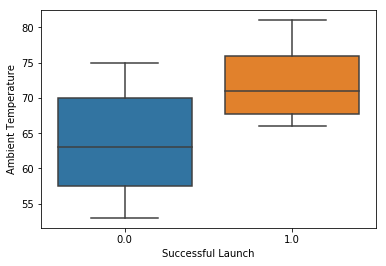

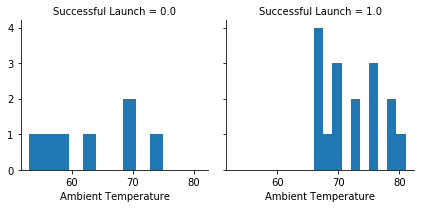

In [4]:
sns.boxplot(data=clr_launch, x="Successful Launch", y="Ambient Temperature")
plt.show()

suc_facet = sns.FacetGrid(data=clr_launch, col="Successful Launch")
suc_facet = suc_facet.map(plt.hist, "Ambient Temperature")
plt.show()

## 3. Scatterplot with regression line & Linear Regression Equation

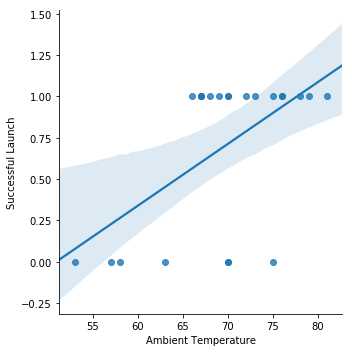

In [5]:
sns.lmplot(data=clr_launch, x="Ambient Temperature", y="Successful Launch")
plt.show()

In [6]:
X = clr_launch['Ambient Temperature'].values
X = sm.add_constant(X)

model = sm.OLS(clr_launch['Successful Launch'], X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Successful Launch   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     9.630
Date:                Thu, 19 Apr 2018   Prob (F-statistic):            0.00538
Time:                        09:00:41   Log-Likelihood:                -10.441
No. Observations:                  23   AIC:                             24.88
Df Residuals:                      21   BIC:                             27.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9048      0.842     -2.262      0.034      -3.656      -0.154
x1             0.0374      0.012      3.103      0.005       0.012       0.062
==============================================================================
Omnibus:                        4.037   Durbin-Watson:                   1.811
Prob(Omnibus):                  0.133   Jarque-Bera (JB):                3.150
Skew:                          -0.903   Prob(JB):                        0.207
Kurtosis:                       2.836   Cond. No.                         708.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
preds = model.predict([[1,60], [1,85]])
coef = round(model.params[1],6)
const = round(model.params[0], 6)

print('EQUATION: yhat = '+str(coef)+' * X'+str(const))
print()
print("Statsmodels predicted values : \n"+"yhat 60 = "+str(preds[0])+"\n"+"yhat 85 = "+str(preds[1]))

EQUATION: yhat = 0.037381 * X-1.904762

Statsmodels predicted values : 
yhat 60 = 0.338095238095
yhat 85 = 1.27261904762


## 4. Solve Equation 7.5

Linear function $$y=b_0 + b_1(x)$$

Sigmoid function $$ p = \frac{1}{1+e^{-y}}$$

Combine the 2 previous calculations so that we're solving for y ...

$$ln\biggl(\frac{\pi_i}{1 - \pi_i}\biggl) = \beta_ 0 + \beta_ 1x_i$$

And then calculas again to have it solve for probability ...

$$\pi_i = \frac{e^{\beta_0 + \beta_1x_i}}{1 + e^{\beta_0 + \beta_1x_i}}$$

bam.

## 5. Use equation 7.6 to create 6 graphs ...

In [10]:
def equation(scores):
    sig = np.exp(scores) / (1 + np.exp(scores))
    
    return sig

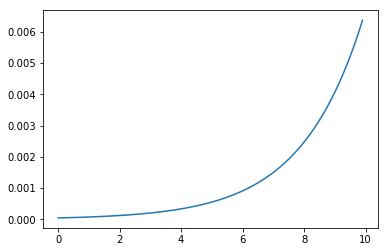

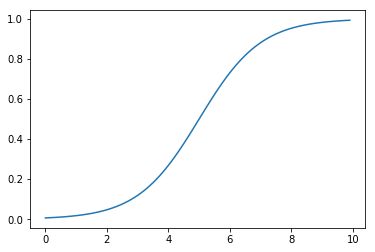

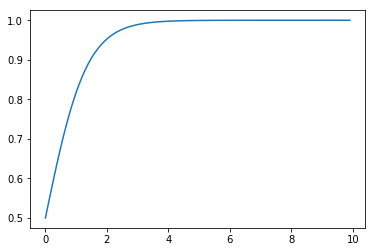

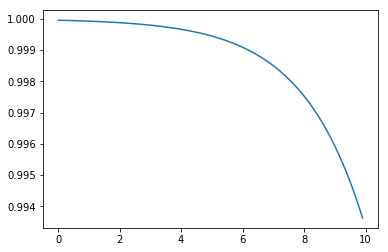

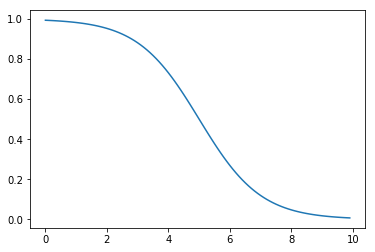

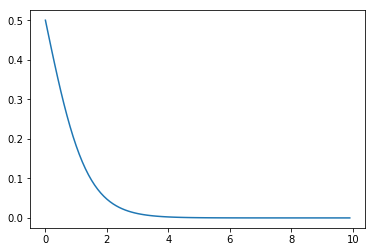

In [11]:
xvals = np.arange(0,10, .1)
bvals = np.array([[-10, 0.5], [-5, 1], [0, 1.5], [10, -0.5], [5, -1], [0, -1.5]])

for b in bvals:
    plt.plot(xvals, [equation(b[0] + b[1]*n) for n in xvals])
    plt.show()
    
# beta1's which give the highest level of weight to our x values innevitably create the steepest slopes.

## 6. compare probabilities from logistic to linear

In [12]:
lm_predicts = model.predict()

X = clr_launch['Ambient Temperature'].values
X = sm.add_constant(X)

logmodel = sm.Logit(clr_launch['Successful Launch'], X).fit()
logmodel_predict = logmodel.predict()

# 3 misclassifications between linear and actual
print()
print("SS for logistic model:")
print(sum(abs(logmodel_predict - clr_launch['Successful Launch'])))
print("MLE Hessian values for logistic model:")
print(logmodel.mle_retvals['Hessian'])
# 3 misclassifications between linear and actual
print()
print("SS for linear model:")
print(sum(abs(lm_predicts - clr_launch['Successful Launch'])))

Optimization terminated successfully.
         Current function value: 0.441635
         Iterations 7

SS for logistic model:
6.44885930421
MLE Hessian values for logistic model:
[[  -0.14185851   -9.64343583]
 [  -9.64343583 -659.2648879 ]]

SS for linear model:
7.0419047619


## 7. Predict likelihood of o-ring failure given the logistic regression equation ...

In [13]:
def oring_log(x):
    return np.exp(-15.043+0.232*x) / (1 + np.exp(-15.043 + 0.232*x))

In [14]:
for t in [31, 50, 75]:
    print('Probability of no O-ring failure at '+str(t)+" Farenheit:")
    print(round(oring_log(t),6))
    print()

Probability of no O-ring failure at 31 Farenheit:
0.000389

Probability of no O-ring failure at 50 Farenheit:
0.030978

Probability of no O-ring failure at 75 Farenheit:
0.913489



## 8. Predict at 60 and 70 ... 

In [15]:
lg_pred = logmodel.predict([[1,60], [1,70]])
print("Odds of no damage at 60: "+ str(lg_pred[0]))
print("Odds of no damage at 70: "+ str(lg_pred[1]))

Odds of no damage at 60: 0.247286518475
Odds of no damage at 70: 0.770031742164


## 9. increments between 60 & 70

In [16]:
odds_rat = logmodel.predict([1,70]) / logmodel.predict([1,60])
print("We would expect the odds to change by "+str(round(odds_rat[0], 6))+' between 60 and 70 degrees')

We would expect the odds to change by 3.113925 between 60 and 70 degrees


## 10. explain odds diff from 52 to 51 relative to 60 to 59

In [17]:
diff6059 = logmodel.predict([1,60]) - logmodel.predict([1,59])
diff5251 = logmodel.predict([1,52]) - logmodel.predict([1,51])
print("Difference in probs between 60 and 59: ", *diff6059)
print("Difference in probs between 51 and 52: ", *diff5251)

Difference in probs between 60 and 59:  0.0406466490884
Difference in probs between 51 and 52:  0.00971141799093


51-52 is along the base of the S-curve (or sigmoid) still and as such, differences in probabilties are being minimized since 51 and 52 farenheit are both likely to be classed as a failed launch. As the temperature increases, that certainty diminishes and probabilities rise quicker through the 50% certainty mark until hitting the mirror state of the S curve where certainty becomes more established and larger increases in temperature are required to increase probability.

## 11. Plot 2 logistic regressions using OLS and ML

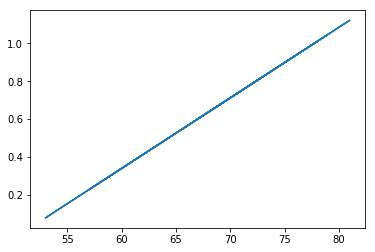

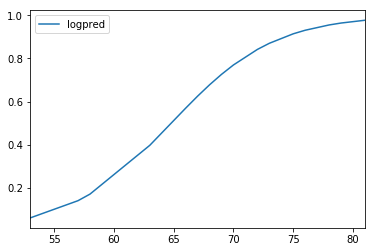

In [18]:
plt.plot(clr_launch['Ambient Temperature'], model.predict())
plt.show()

logdf = pd.DataFrame(logmodel.predict().tolist(), clr_launch['Ambient Temperature'].tolist())
logdf.columns = ['logpred']
logdf.sort_values('logpred').plot()
plt.show()

## 12. Odds ratio and confidence interval

In [19]:
odds_rat = logmodel.predict([1,60]) / logmodel.predict([1,31])
print("Odds Ratio is: "+str(*odds_rat))

R = [[31,60]]
wstat = logmodel.wald_test(R)
print("The confidence interval as supplied by Wald Test is: "+str(*wstat.statistic[0]))
print("95% confidence interval as supplied by Wald test is: "+str(wstat.pvalue))

Odds Ratio is: 632.095347955
The confidence interval as supplied by Wald Test is: 4.14298771728
95% confidence interval as supplied by Wald test is: 0.04180731826690692


## 13. Reverse 0 and 1 and answer some questions ...

In [20]:
clr_launch_r = clr_launch.copy()
clr_launch_r['Successful Launch'] = clr_launch_r['Successful Launch'].apply(lambda x: abs(x-1))

X = clr_launch_r['Ambient Temperature'].values
X = sm.add_constant(X)

logmodel_r = sm.Logit(clr_launch_r['Successful Launch'], X).fit()

logmodel_r.summary()

Optimization terminated successfully.
         Current function value: 0.441635
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:      Successful Launch   No. Observations:                   23
Model:                          Logit   Df Residuals:                       21
Method:                           MLE   Df Model:                            1
Date:                Thu, 19 Apr 2018   Pseudo R-squ.:                  0.2813
Time:                        09:33:05   Log-Likelihood:                -10.158
converged:                       True   LL-Null:                       -14.134
                                        LLR p-value:                  0.004804
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.0429      7.379      2.039      0.041       0.581      29.505
x1            -0.2322      0.108     -2.145      0.032      -0.444      -0.020
==============================================================================
"""

#### a. The models are mirror reflections of one another ... obviously because this is an S curve. Log- likelihood, pvals and constant / coef are all the same absolute values as the original model.

#### b. The regression coeeficients have mirrored where the constant is now positive while the coef is negative. Our temperature is multiplied by -0.2322 then has 15.0429 added to it before being thrown into a sigmoid and compressed between 0 and 1.

#### c. odds ratio's are the inverse of one another (ie. 1/1.2613...) so again ... a literal mirror reflection

In [21]:
orig_oddr = np.exp(logmodel.params[1])
new_oddr = np.exp(logmodel_r.params[1])

print("Odds ratio for original: "+str(orig_oddr))
print("Odds ratio for reversed successes: "+str(new_oddr))

Odds ratio for original: 1.26132498547
Odds ratio for reversed successes: 0.79281708641


#### d. new Wald test, results are unchanged

In [22]:
R = [[clr_launch_r['Ambient Temperature'].min(), clr_launch_r['Ambient Temperature'].min()]]


wstat = logmodel_r.wald_test(R)
print("The confidence interval as supplied by Wald Test is: "+str(*wstat.statistic[0]))
print("95% confidence interval as supplied by Wald test is: "+str(wstat.pvalue))

The confidence interval as supplied by Wald Test is: 4.14953916593
95% confidence interval as supplied by Wald test is: 0.04164585653161201


In [23]:
logmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:      Successful Launch   No. Observations:                   23
Model:                          Logit   Df Residuals:                       21
Method:                           MLE   Df Model:                            1
Date:                Thu, 19 Apr 2018   Pseudo R-squ.:                  0.2813
Time:                        09:33:12   Log-Likelihood:                -10.158
converged:                       True   LL-Null:                       -14.134
                                        LLR p-value:                  0.004804
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -15.0429      7.379     -2.039      0.041     -29.505      -0.581
x1             0.2322      0.108      2.145      0.032       0.020       0.444
==============================================================================
"""

#### 15. Likelihood Ratio Test

In [24]:
rest_m = np.exp(logmodel.params[0]) / (1+ np.exp(logmodel.params[0]))


full_m = [np.exp(logmodel.params[0] + (logmodel.params[1]*x)) / 
          (1+ np.exp(logmodel.params[0]) + (logmodel.params[1]*x))
          for x in clr_launch['Ambient Temperature'].values]

In [25]:
## Thank God they tell us how a log likelihood function works, otherwise I'd be really pissed ... :(
## anyways here it is in black box form ....

In [26]:
lrt = logmodel.llr
lrt_p = logmodel.llr_pvalue
print("Log Likelihood Ratio of logistic regression: "+ str(lrt))
print("P value of log likelihood ratio in logistic regression: "+str(lrt_p))

Log Likelihood Ratio of logistic regression: 7.95196004643
P value of log likelihood ratio in logistic regression: 0.00480353251014


# 7.8 Combining my love of statistical models, curing disease and breasts ...

## 15. make a logistic regression ...

In [27]:
cnr = pd.read_csv('C7 Cancer2.csv')

In [28]:
formula = 'Malignant ~ radius + C(concavity)'

In [29]:
cnr_model = sm.Logit.from_formula(formula=formula, data=cnr).fit()

Optimization terminated successfully.
         Current function value: 0.196851
         Iterations 8


#### a.  return the new model

In [30]:
cnr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Malignant   No. Observations:                  569
Model:                          Logit   Df Residuals:                      566
Method:                           MLE   Df Model:                            2
Date:                Thu, 19 Apr 2018   Pseudo R-squ.:                  0.7019
Time:                        09:33:32   Log-Likelihood:                -112.01
converged:                       True   LL-Null:                       -375.72
                                        LLR p-value:                2.960e-115
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -13.1320      1.493     -8.795      0.000     -16.059     -10.205
C(concavity)[T.1]     3.3192      0.355      9.362      0.000       2.624       4.014
radius                2.7175      0.366      7.418      0.000       1.999       3.436
=====================================================================================
"""

#### b. submit the likelihood ratio test result

In [31]:
print('Log Likelihood Ratio Test Results: '+str(cnr_model.llr))
print('Log Likelihood Ratio p val: '+str(cnr_model.llr_pvalue))

Log Likelihood Ratio Test Results: 527.424051578
Log Likelihood Ratio p val: 2.96020909307e-115


#### c. predicting for concave and round cells with radius of 4 and % chance of malignancy

In [32]:
c1r4 = {'concavity':[1], 'radius': [4]}
c0r4 = {'concavity':[0], 'radius': [4]}

print("Event probability for concave:1, radius:4: "+str(cnr_model.predict(c1r4)[0]))
print("Event probability for concave:0, radius:4: "+str(cnr_model.predict(c0r4)[0]))

Event probability for concave:1, radius:4: 0.742155697661
Event probability for concave:0, radius:4: 0.0943216598264


## 16. only radius logistic regression

In [33]:
formula = 'Malignant ~ radius'
cnr_model_rad = sm.Logit.from_formula(formula=formula, data=cnr).fit()

Optimization terminated successfully.
         Current function value: 0.289992
         Iterations 8


#### a. radius only logistic regression model ...

In [34]:
cnr_model_rad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Malignant   No. Observations:                  569
Model:                          Logit   Df Residuals:                      567
Method:                           MLE   Df Model:                            1
Date:                Thu, 19 Apr 2018   Pseudo R-squ.:                  0.5608
Time:                        09:33:42   Log-Likelihood:                -165.01
converged:                       True   LL-Null:                       -375.72
                                        LLR p-value:                 1.192e-93
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -15.2459      1.325    -11.509      0.000     -17.842     -12.649
radius         3.6165      0.326     11.100      0.000       2.978       4.255
==============================================================================
"""

#### b. Event probability of radius = 4

In [35]:
r4 = {'radius':[4]}
print("Event probability for radius:4: "+str(cnr_model_rad.predict(r4)[0]))

Event probability for radius:4: 0.314371262757


## 17. odds ratio for concavity of 1st logistic regression

In [36]:
conc_oddr = np.exp(cnr_model.params[1])
print('odds ratio for concavity: '+str(conc_oddr))

odds ratio for concavity: 27.6375813327


## 18. Reverse the outcome variable again ...

In [37]:
cnr_rev = cnr.copy()
cnr_rev['Malignant'] = cnr['Malignant'].apply(lambda x: abs(x-1))

formula = 'Malignant ~ radius + C(concavity)'
cnr_model_rev = sm.Logit.from_formula(formula=formula, data=cnr_rev).fit()

Optimization terminated successfully.
         Current function value: 0.196851
         Iterations 8


In [38]:
conc_oddr_rev = np.exp(cnr_model_rev.params)[1]
print('Odds ratio of our reversed logistic regression '+str(conc_oddr_rev))

Odds ratio of our reversed logistic regression 0.0361826162703
